# Changes in HbA1c Levels During COVID-19 

This notebook describes trends and deviations in HbA1c test results during the COVID-19 pandemic at large and by specific demographic groups. In particular, I report the trends across the mean of test results by month for the following sets: 
1. All tests reported
2. Tests taken by patients with type 1 diabetes
3. Tests taken by patients with type 2 diabetes

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from glob import glob

pd.set_option('display.max_rows', None)

In [2]:
def compute_mean(df_in, group): 
    """
    Computes mean HbA1c levels by demographic group & month.
    
    Arg: 
        df_in (df): Input dataframe
        group (str): Demographic group such as 'age_group', 
                     'sex', 'imd', 'region', and 'diabetes_type'
                     
    Returns:
        Dataframe (df): Dataframe of means by month
    """
    return pd.DataFrame(
        df_in.groupby(by=['date',group])['hba1c_mmol_per_mol'].mean()
    ).reset_index().sort_values(by='date')
    
def create_chart(df_in, group, title):
    """
    Outputs chart demonstrating trends in HbA1c levels by 
    demographic group & month.
    
    Args: 
        df_in (df): Input dataframe
        group (str): Demographic group such as 'age_group', 
                     'sex', 'imd', 'region', and 'diabetes_type'
    """
    plt.figure(figsize = (15,8))
    # Recast IMD to string (correct legend label)
    if group == 'imd':
        df_in.imd = df_in.imd.astype(str)
    elif group == 'ethnicity':
        df_in.ethnicity = df_in.ethnicity.astype(str)
    # Plot error bars if full population chart
    if (
        group=='population'
    ) or (
        group == 'learning_disability'
    ) or (
        group == 'mental_illness'
    ):
        ax = sns.lineplot(x = 'date', y = 'hba1c_mmol_per_mol', data = df_in)
    else:
        ax = sns.lineplot(x = 'date', y = 'hba1c_mmol_per_mol', 
                          hue = group, data = df_in, ci=None)
    locs, labels = plt.xticks()
    plt.xlabel('Date')
    plt.ylabel('HbA1c (mmol/mol)')
    plt.ylim(30,80) 
    plt.title(title)
    plt.setp(labels, rotation=65)
    plt.show()
    print('\n')

In [3]:
# Read in input files
li = []

for file in glob('../output/data/input*.csv'):
    if file.split('_')[1] not in ['ethnicity.csv']:
        df_temp = pd.read_csv(file)
        df_temp['date'] = file[21:-4]
        li.append(df_temp)
    
df_input = pd.concat(li, axis=0, ignore_index=False).reset_index(drop=True)
df_t1 = df_input.loc[df_input.diabetes_t1 == 1].reset_index(drop=True)
df_t2 = df_input.loc[df_input.diabetes_t2 == 1].reset_index(drop=True)

## All Tests

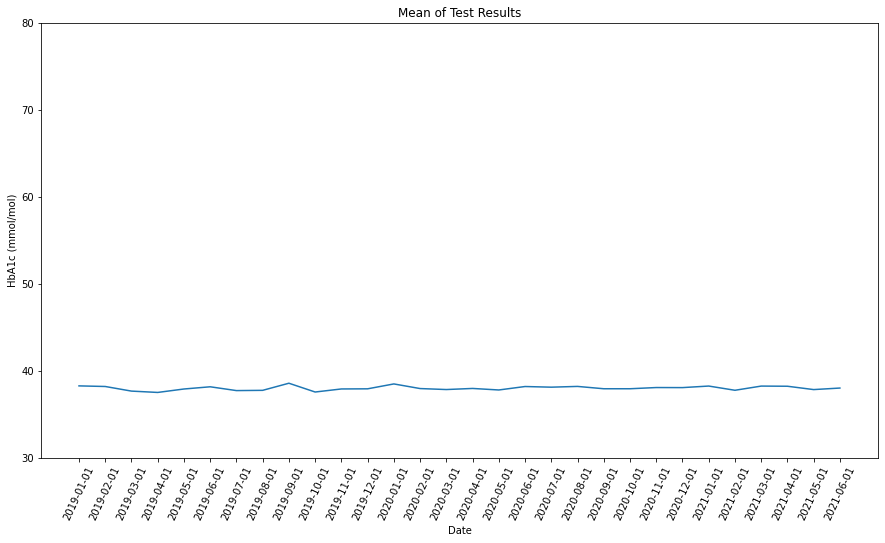

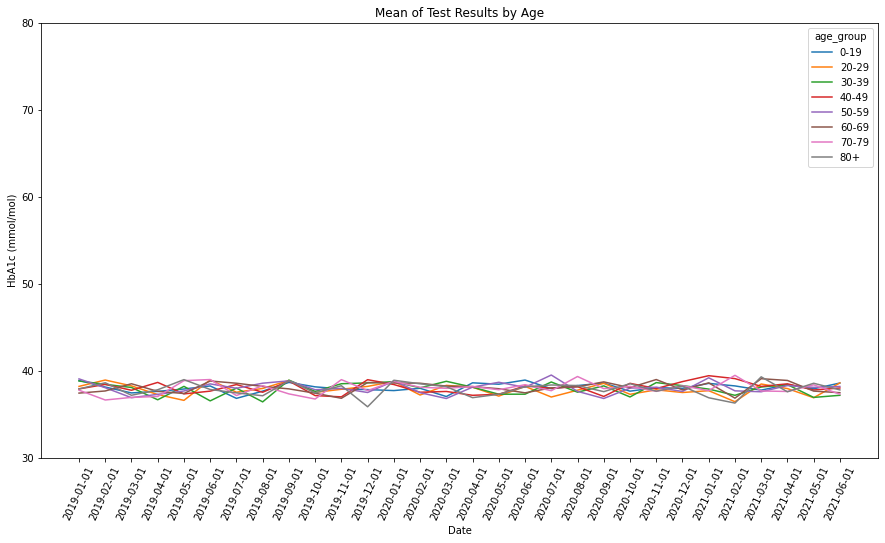

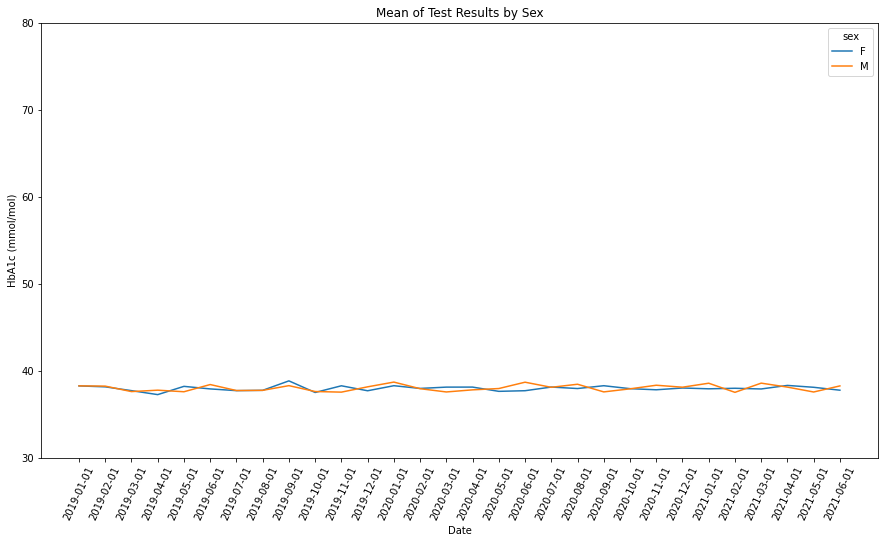

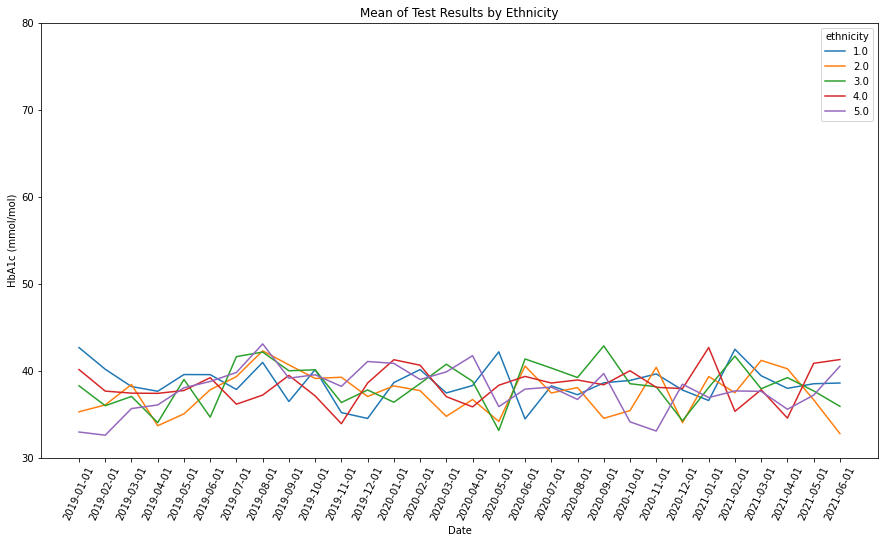

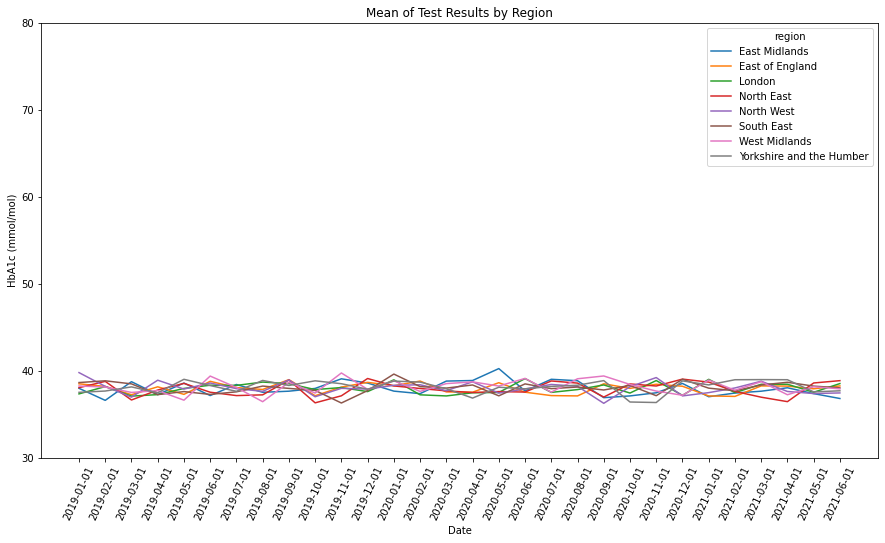

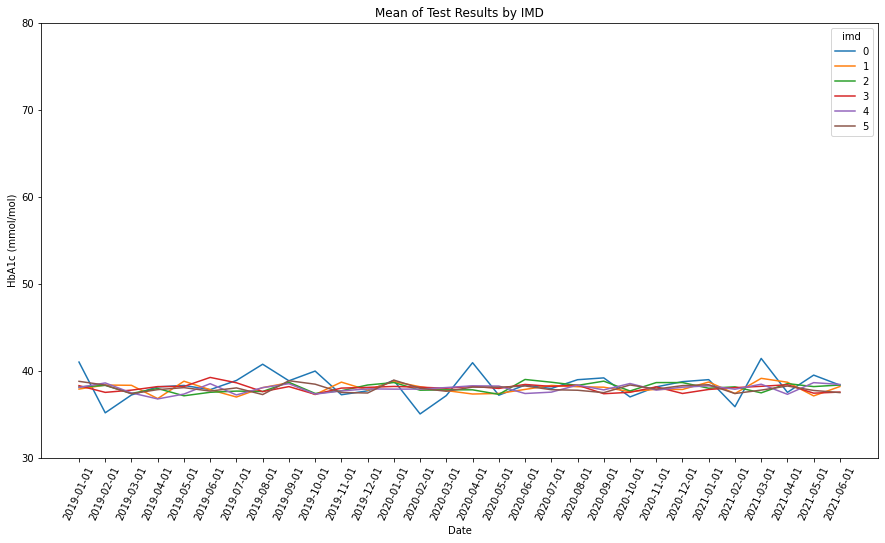

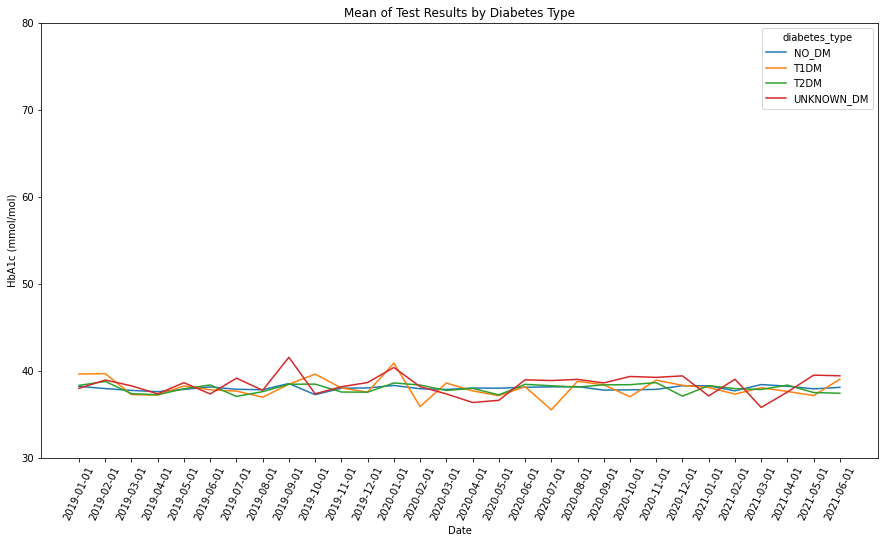

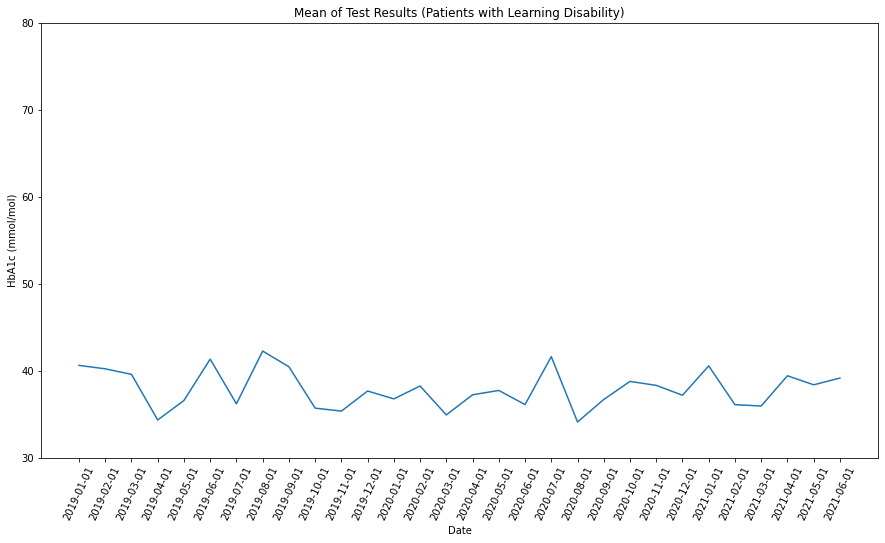

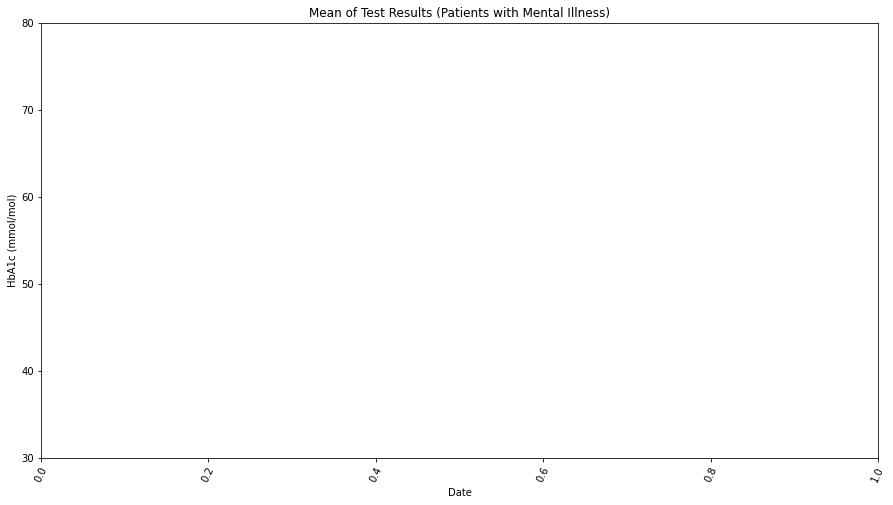

In [4]:
# Population
df_pop = pd.DataFrame(df_input.groupby(by=['date'])['hba1c_mmol_per_mol'].mean()).reset_index()
create_chart(df_pop, 'population', 'Mean of Test Results')

# Age
df_age = compute_mean(df_input, 'age_group')
create_chart(df_age.loc[df_age.age_group != 'missing'], 'age_group', 'Mean of Test Results by Age')

# Sex
df_sex = compute_mean(df_input, 'sex')
create_chart(df_sex.loc[df_sex.sex.isin(['F','M'])], 'sex', 'Mean of Test Results by Sex')

# Ethnicity
df_eth = compute_mean(df_input, 'ethnicity')
create_chart(df_eth, 'ethnicity', 'Mean of Test Results by Ethnicity')

# Region
df_region = compute_mean(df_input, 'region')
create_chart(df_region, 'region', 'Mean of Test Results by Region')

# IMD
df_imd = compute_mean(df_input, 'imd')
create_chart(df_imd, 'imd', 'Mean of Test Results by IMD')

# Diabetes Type
df_dt = compute_mean(df_input, 'diabetes_type')
create_chart(df_dt, 'diabetes_type', 'Mean of Test Results by Diabetes Type')

# Learning Disability
df_ld = compute_mean(df_input, 'learning_disability')
create_chart(df_ld.loc[df_ld.learning_disability == 1], 'learning_disability', 'Mean of Test Results (Patients with Learning Disability)')

# Mental Illness
df_mi = compute_mean(df_input, 'mental_illness')
create_chart(df_mi.loc[df_mi.mental_illness == 1], 'mental_illness', 'Mean of Test Results (Patients with Mental Illness)')

## Tests Taken by Patients with Type 1 Diabetes

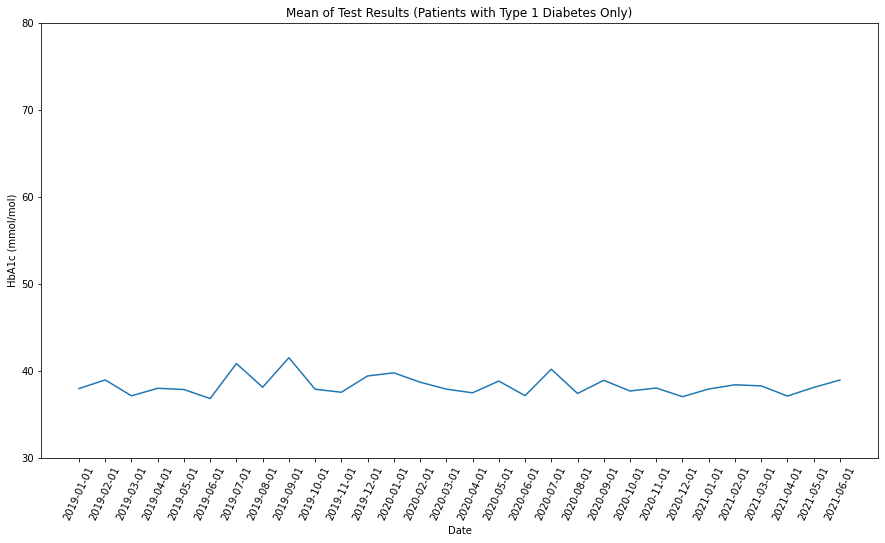

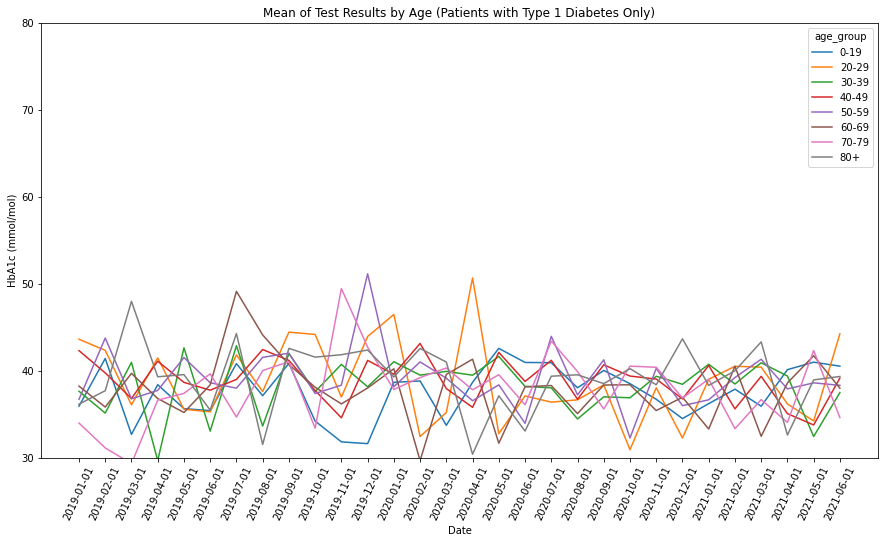

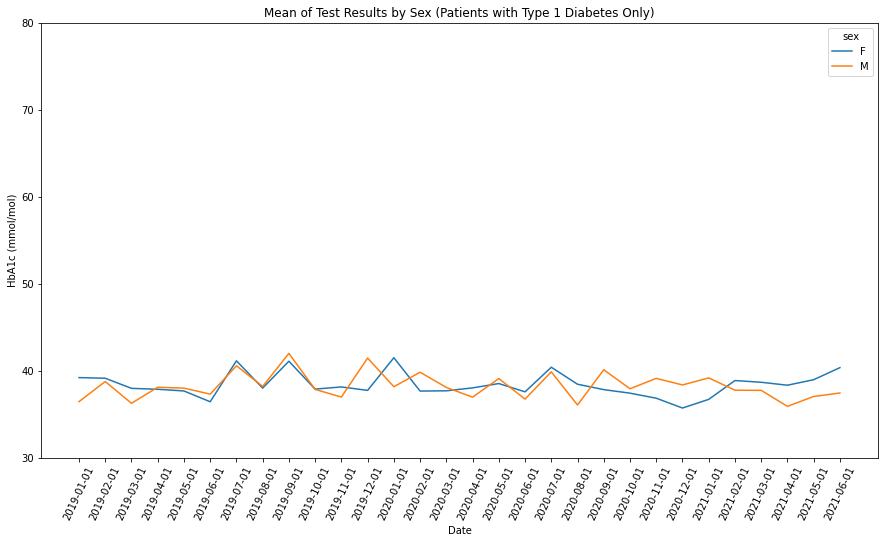

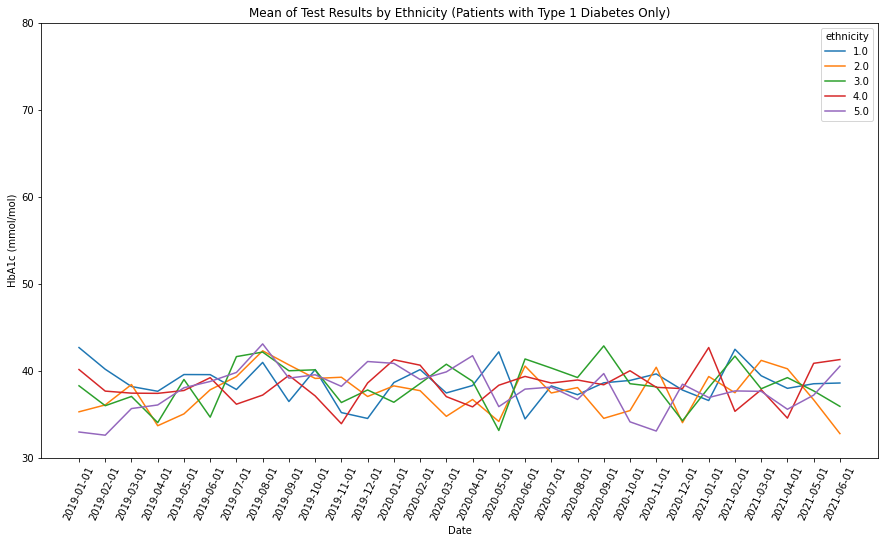

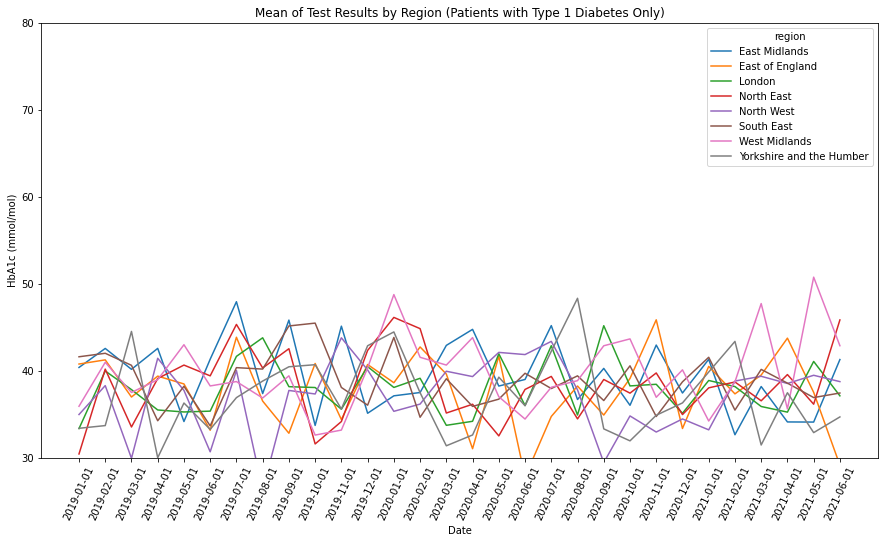

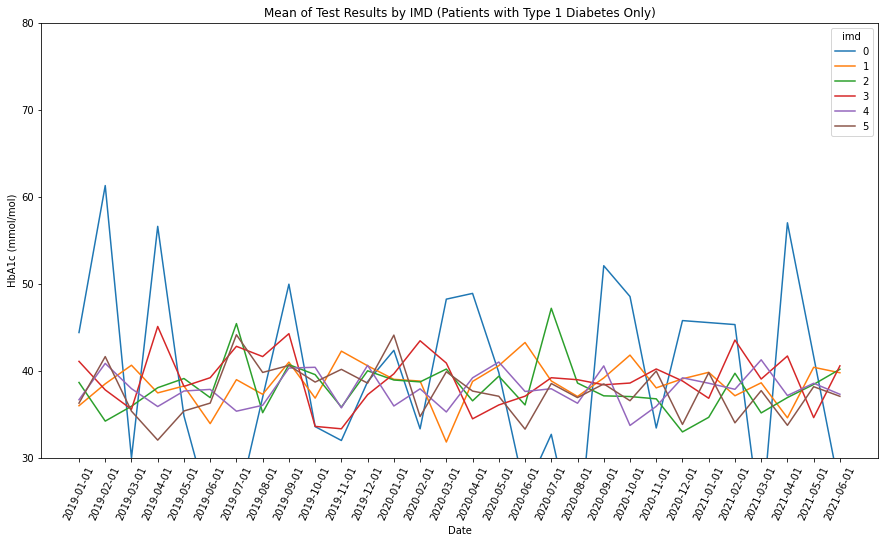

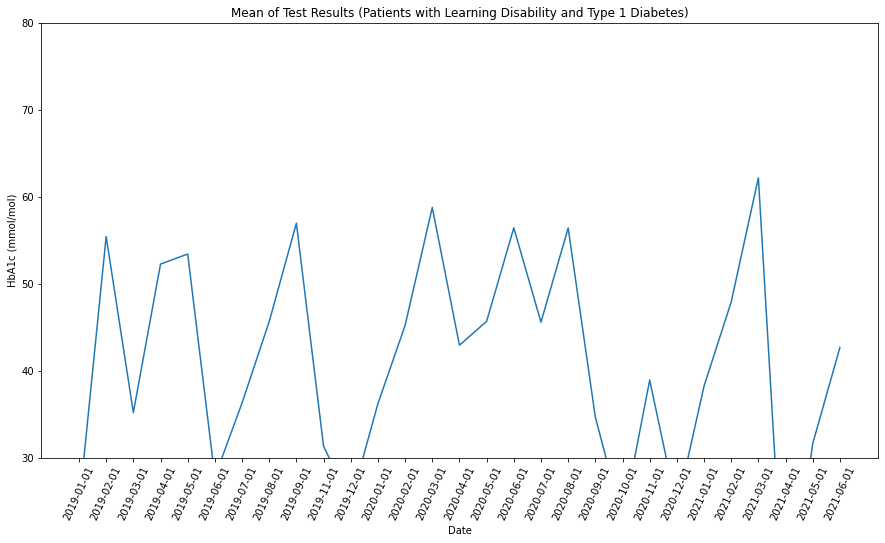

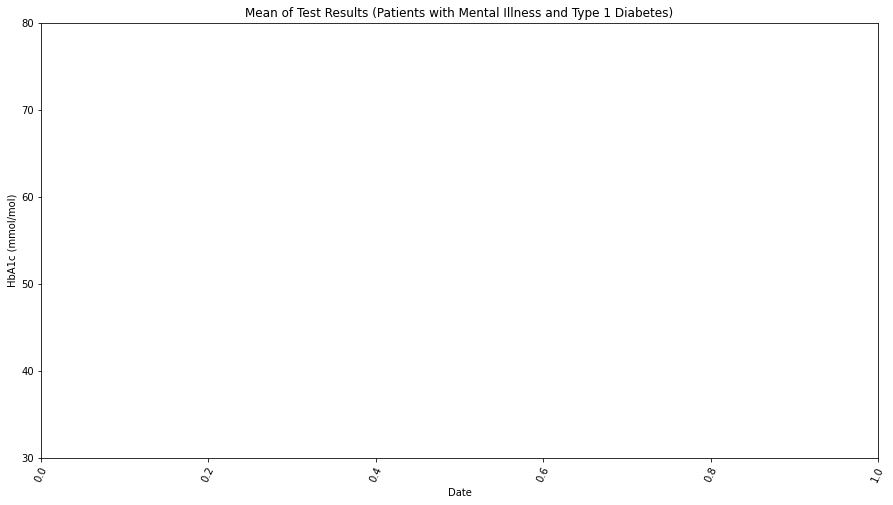

In [5]:
# Population
df_pop_t1 = pd.DataFrame(df_t1.groupby(by=['date'])['hba1c_mmol_per_mol'].mean()).reset_index()
create_chart(df_pop_t1, 'population', 
             'Mean of Test Results (Patients with Type 1 Diabetes Only)')

# Age
df_age_t1 = compute_mean(df_t1, 'age_group')
create_chart(df_age_t1.loc[df_age_t1.age_group != 'missing'], 'age_group', 
             'Mean of Test Results by Age (Patients with Type 1 Diabetes Only)')

# Sex
df_sex_t1 = compute_mean(df_t1, 'sex')
create_chart(df_sex_t1.loc[df_sex_t1.sex.isin(['F','M'])], 'sex', 
             'Mean of Test Results by Sex (Patients with Type 1 Diabetes Only)')

# Ethnicity
df_eth_t1 = compute_mean(df_t1, 'ethnicity')
create_chart(df_eth, 'ethnicity', 
             'Mean of Test Results by Ethnicity (Patients with Type 1 Diabetes Only)')

# Region
df_region_t1 = compute_mean(df_t1, 'region')
create_chart(df_region_t1, 'region', 
             'Mean of Test Results by Region (Patients with Type 1 Diabetes Only)')

# IMD
df_imd_t1 = compute_mean(df_t1, 'imd')
create_chart(df_imd_t1, 'imd', 
             'Mean of Test Results by IMD (Patients with Type 1 Diabetes Only)')

# Learning Disability
df_ld_t1 = compute_mean(df_t1, 'learning_disability')
create_chart(df_ld_t1.loc[df_ld_t1.learning_disability == 1], 'learning_disability', 'Mean of Test Results (Patients with Learning Disability and Type 1 Diabetes)')

# Mental Illness
df_mi_t1 = compute_mean(df_t1, 'mental_illness')
create_chart(df_mi_t1.loc[df_mi_t1.mental_illness == 1], 'mental_illness', 'Mean of Test Results (Patients with Mental Illness and Type 1 Diabetes)')

## Tests Taken by Patients with Type 2 Diabetes

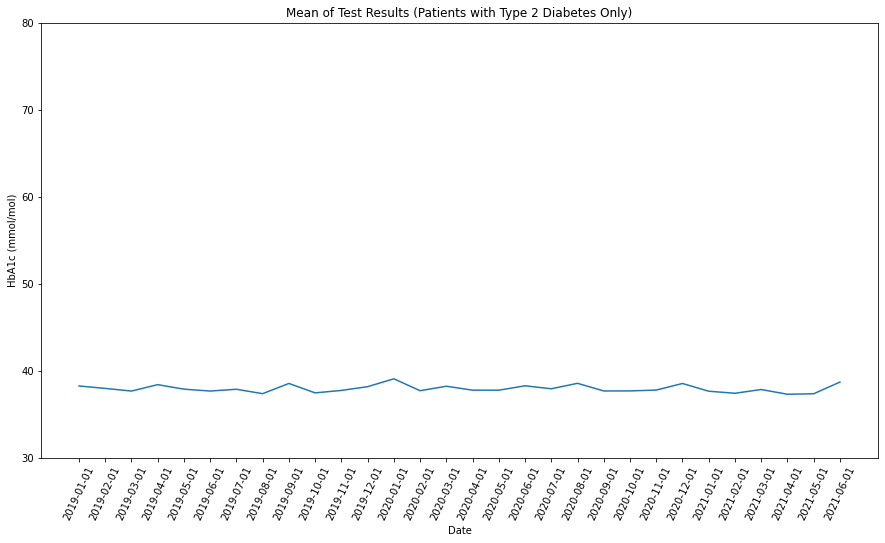

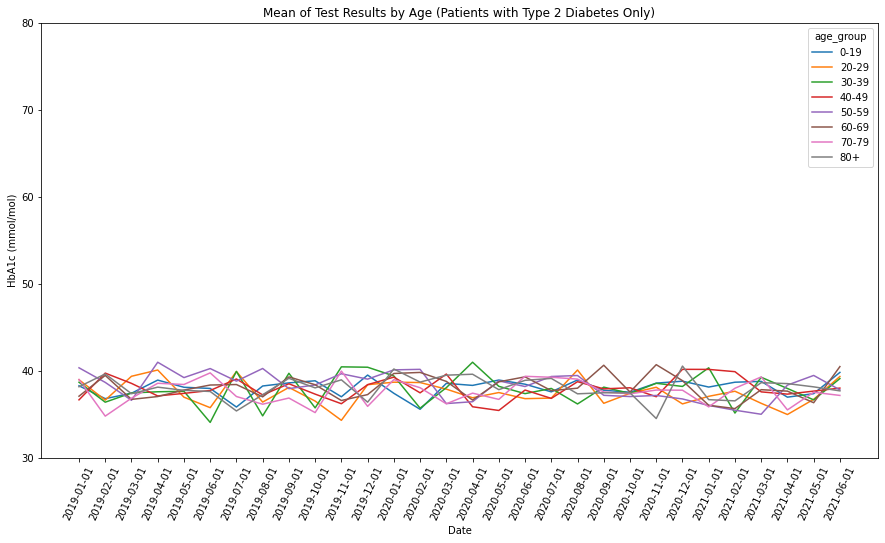

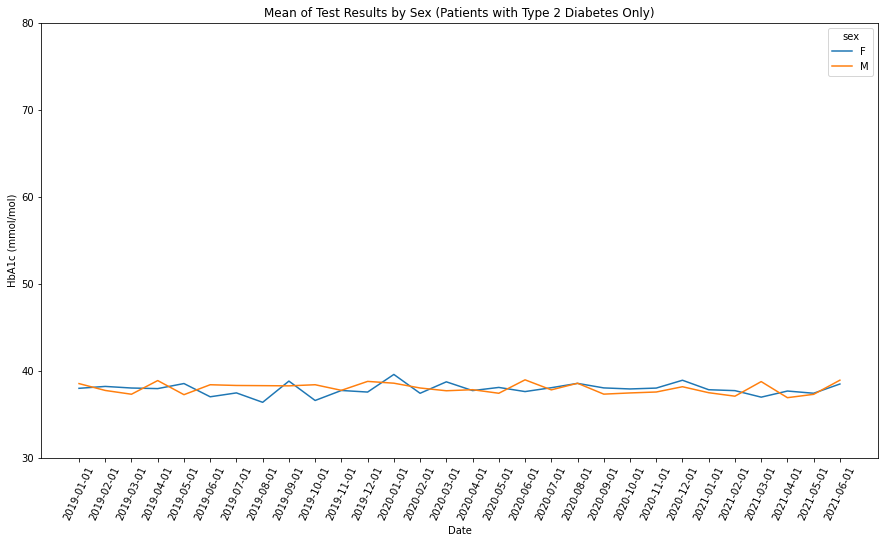

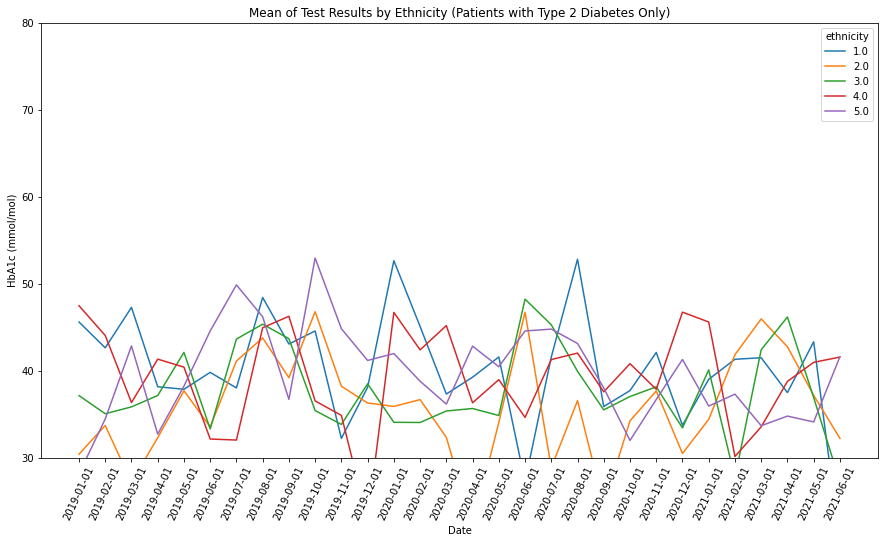

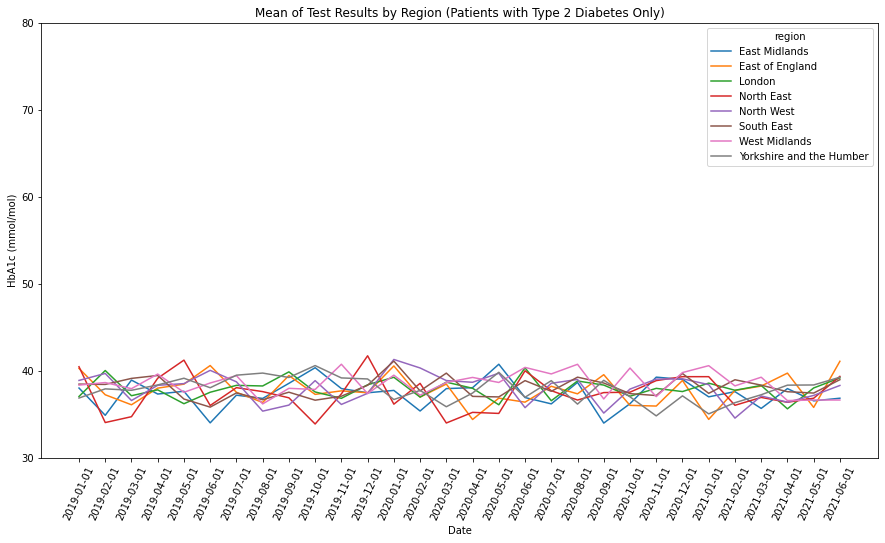

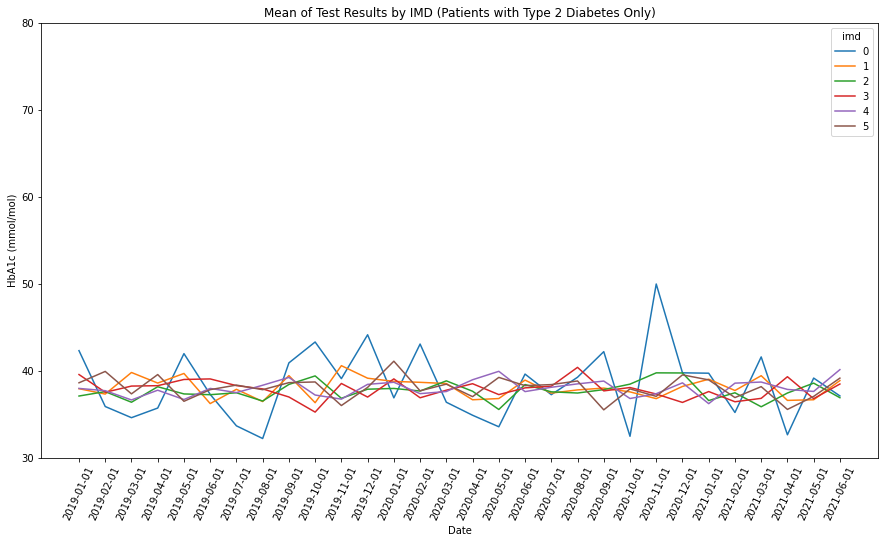

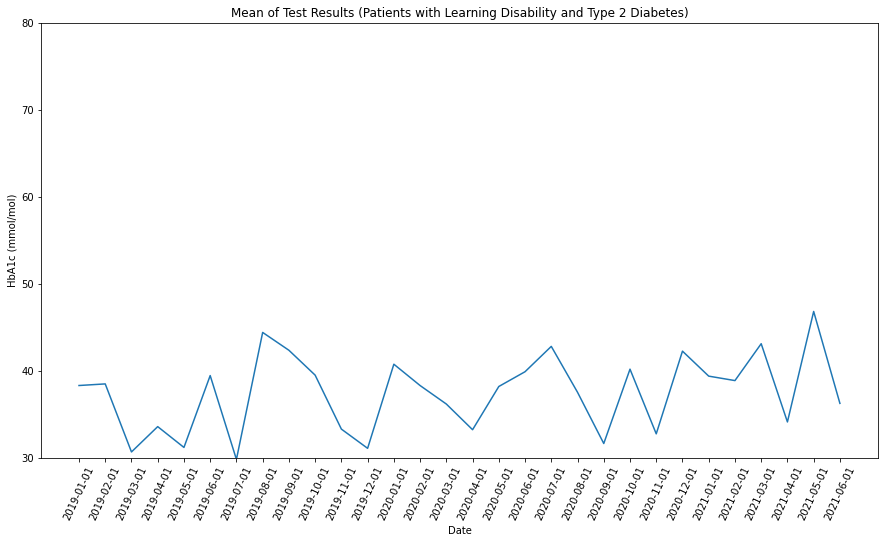

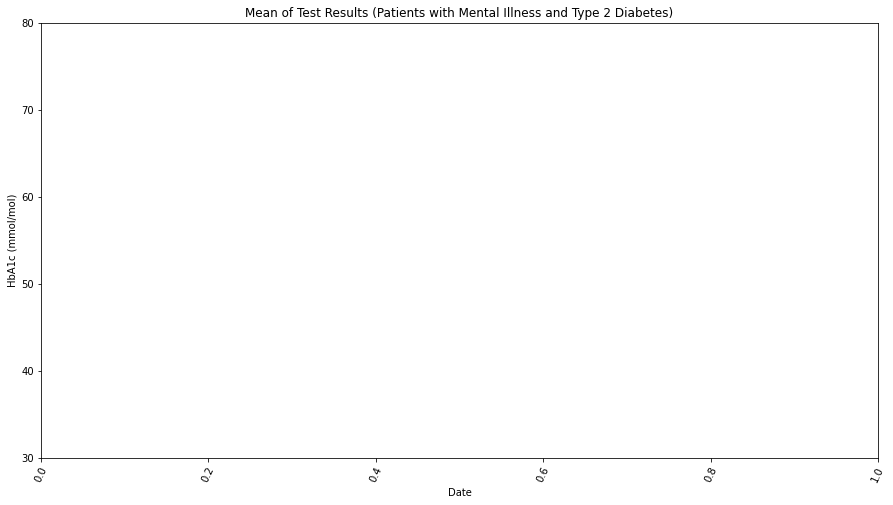

In [6]:
# Population
df_pop_t2 = pd.DataFrame(df_t2.groupby(by=['date'])['hba1c_mmol_per_mol'].mean()).reset_index()
create_chart(df_pop_t2, 'population', 
             'Mean of Test Results (Patients with Type 2 Diabetes Only)')

# Age
df_age_t2 = compute_mean(df_t2, 'age_group')
create_chart(df_age_t2.loc[df_age_t2.age_group != 'missing'], 'age_group', 
             'Mean of Test Results by Age (Patients with Type 2 Diabetes Only)')

# Sex
df_sex_t2 = compute_mean(df_t2, 'sex')
create_chart(df_sex_t2.loc[df_sex_t2.sex.isin(['F','M'])], 'sex', 
             'Mean of Test Results by Sex (Patients with Type 2 Diabetes Only)')

# Ethnicity
df_eth_t2 = compute_mean(df_t2, 'ethnicity')
create_chart(df_eth_t2, 'ethnicity', 
             'Mean of Test Results by Ethnicity (Patients with Type 2 Diabetes Only)')

# Region
df_region_t2 = compute_mean(df_t2, 'region')
create_chart(df_region_t2, 'region', 
             'Mean of Test Results by Region (Patients with Type 2 Diabetes Only)')

# IMD
df_imd_t2 = compute_mean(df_t2, 'imd')
create_chart(df_imd_t2, 'imd', 
             'Mean of Test Results by IMD (Patients with Type 2 Diabetes Only)')

# Learning Disability
df_ld_t2 = compute_mean(df_t2, 'learning_disability')
create_chart(df_ld_t2.loc[df_ld_t2.learning_disability == 1], 'learning_disability', 'Mean of Test Results (Patients with Learning Disability and Type 2 Diabetes)')

# Mental Illness
df_mi_t2 = compute_mean(df_t2, 'mental_illness')
create_chart(df_mi_t2.loc[df_mi_t2.mental_illness == 1], 'mental_illness', 'Mean of Test Results (Patients with Mental Illness and Type 2 Diabetes)')